#### **First Step**: Consulting the clean data to the Database

Task:

- Establish connection to the database
- Load data into a data frame such as `df` for visualizations

In [2]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt


# Add the 'src' folder to sys.path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from connections.db import DB

db = DB()

In [3]:
# Fetch the data from the database as a dataframe
df = db.fetch_as_dataframe('../sql/queries/005_get_clean_data.sql')

2024-08-19 00:13:44,984 - ✔ Connected to database
2024-08-19 00:13:49,188 - ✔ Data loaded into DataFrame
2024-08-19 00:13:49,191 - ✔ Cursor closed
2024-08-19 00:13:49,192 - ✔ Connection closed


----

#### **Second Step**: Make the visualization

Task:

- Hires by technology (pie chart)
- Hires by year (horizontal bar chart)
- Hires by seniority (bar chart)
- Hires by country over years (USA, Brazil, Colombia, and Ecuador only)(multiline chart)

<Axes: title={'center': 'Technology Distribution'}>

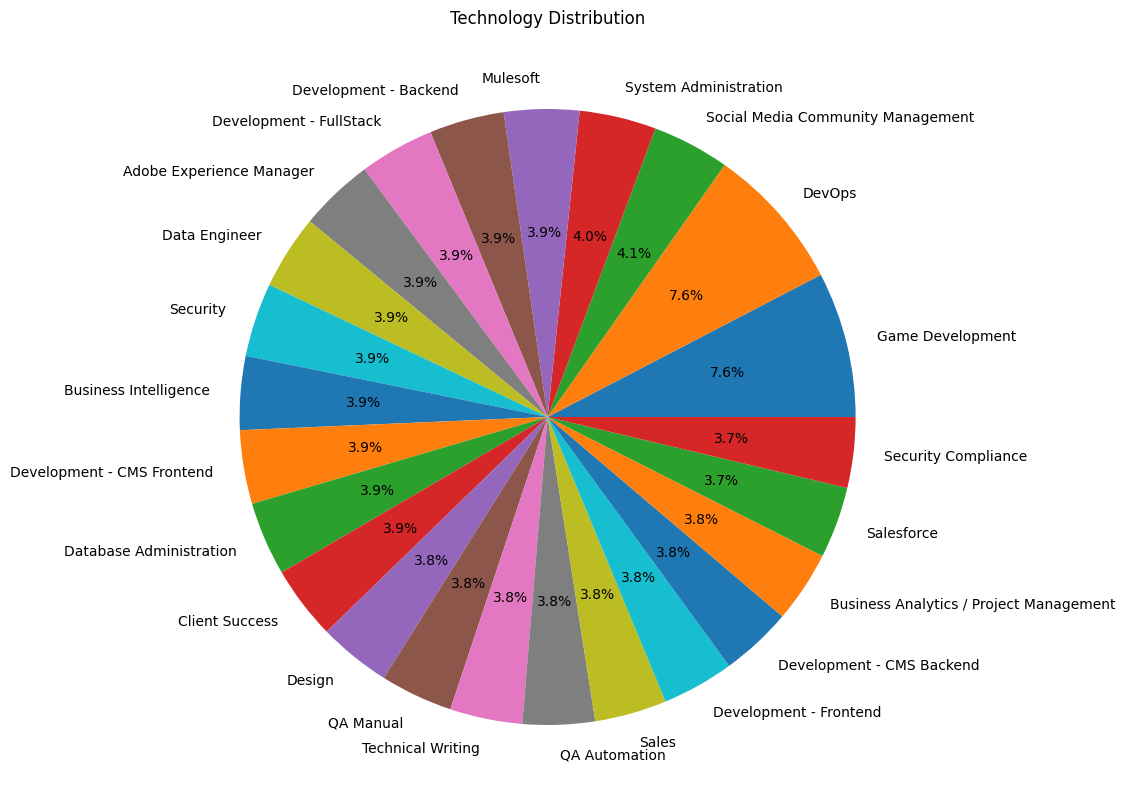

In [4]:
# Hires by technology (pie chart)
df['technology'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), title='Technology Distribution', ylabel='')

> Note:
>
> As we can see, we have many categories for the variable Technology. However, being such similar categories, we can make groupings to generalize a bit and have more useful information. For this we will use the technology_topic column, which was added in the data cleaning process for just this purpose.

<Axes: title={'center': 'Technology Topic Distribution'}>

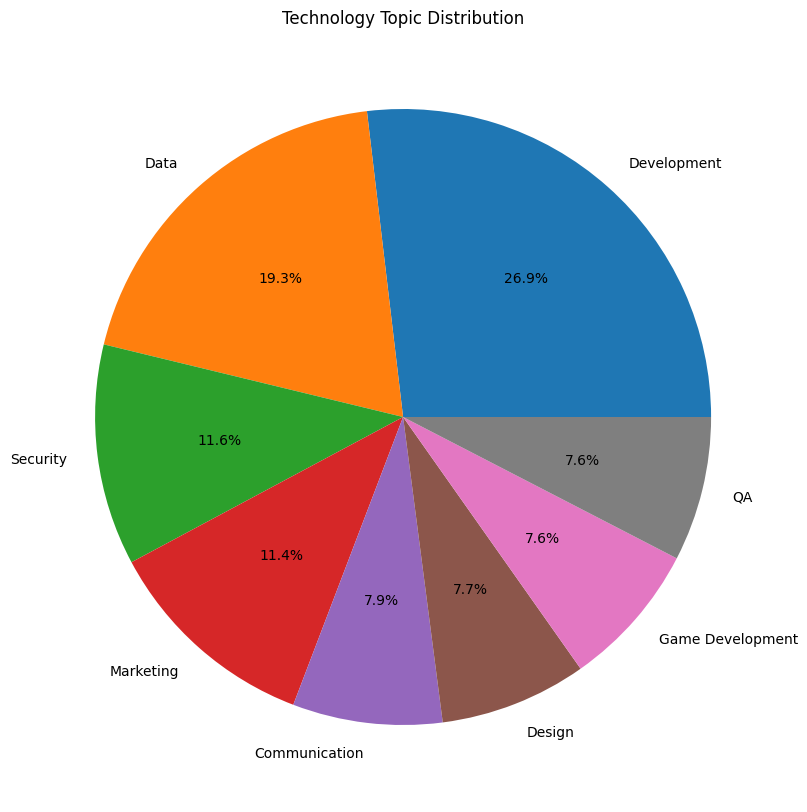

In [5]:
# Hires by technology (pie chart)
df['technology_topic'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), title='Technology Topic Distribution', ylabel='')

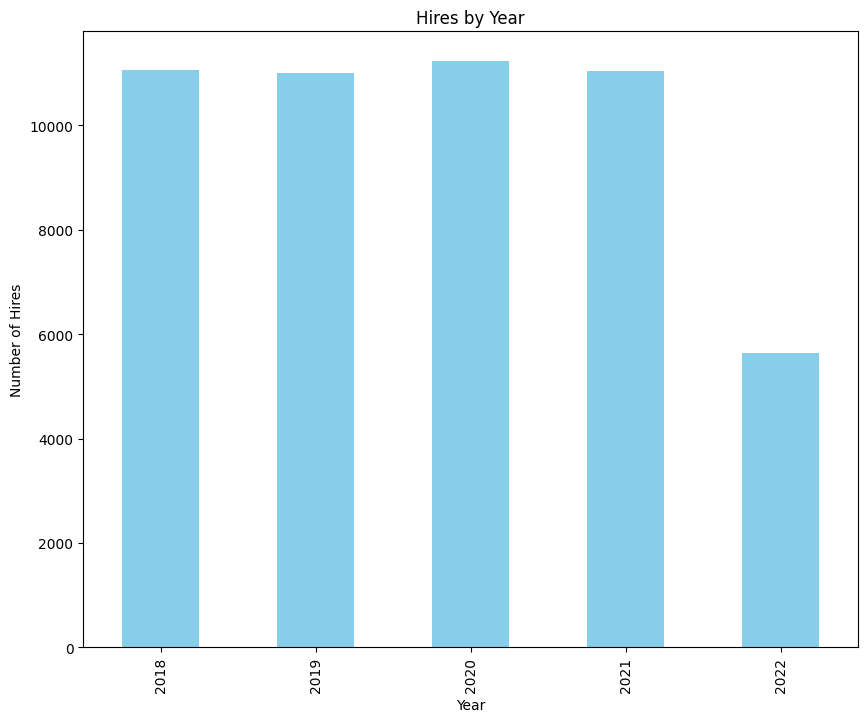

In [6]:
# Hires by year (horizontal bar chart)
df['application_date'].dt.year.value_counts().sort_index().plot(
    kind='bar',
    figsize=(10, 8),
    color= 'skyblue',
    title='Hires by Year',
    xlabel='Year',
    ylabel='Number of Hires'
)
plt.show()


<Axes: title={'center': 'Hires by Seniority'}, xlabel='Seniority', ylabel='Number of Hires'>

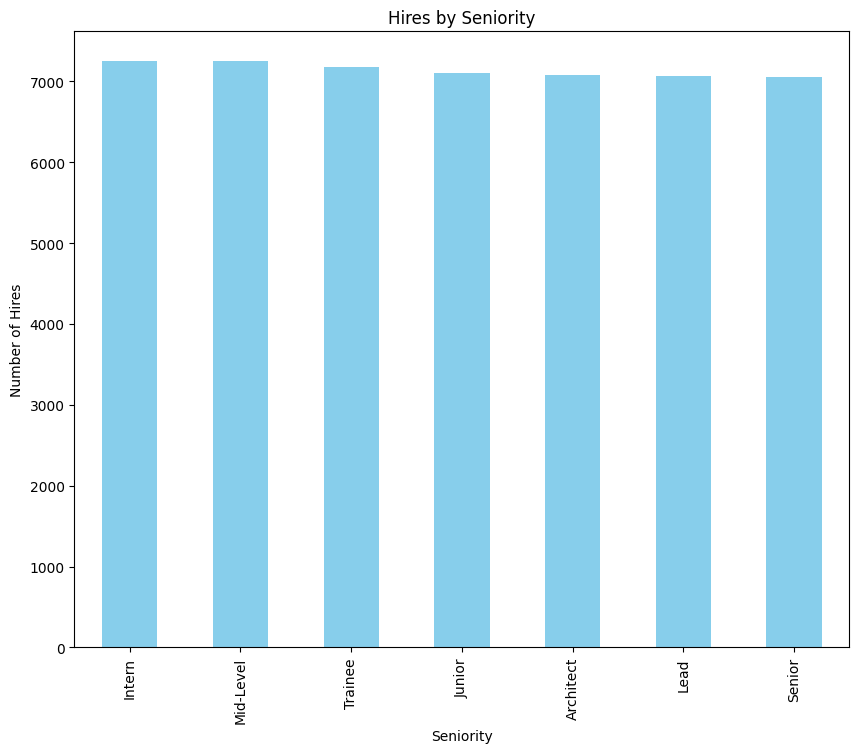

In [7]:
# Hires by seniority (bar chart)
df['seniority'].value_counts().plot(kind='bar', figsize=(10, 8), color='skyblue', title='Hires by Seniority', xlabel='Seniority', ylabel='Number of Hires')

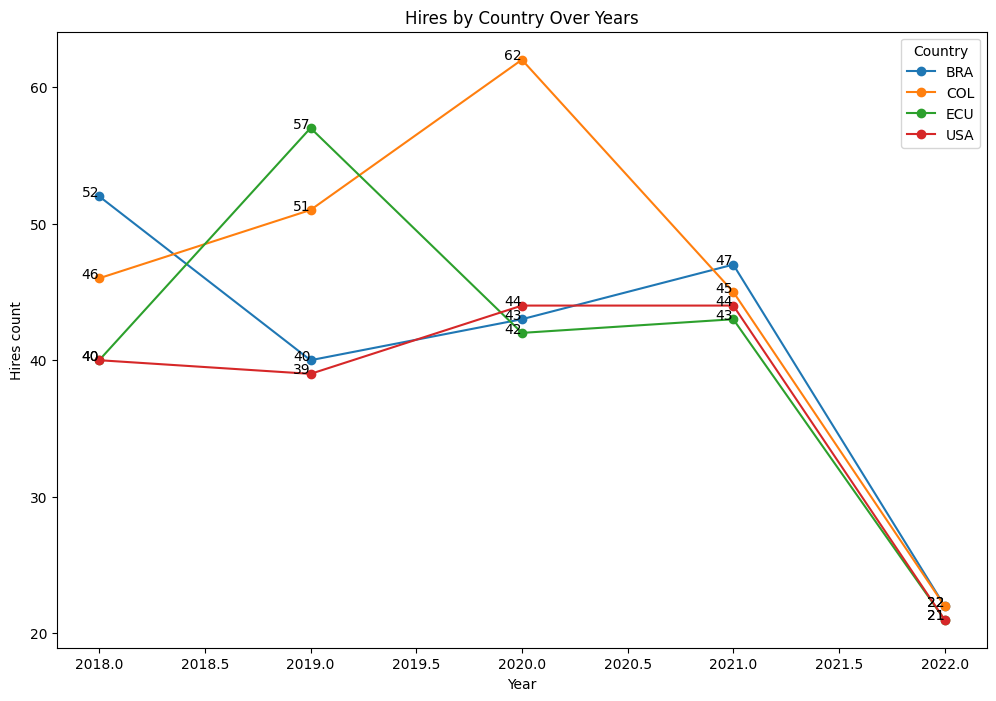

In [8]:
# Mapping of the dataframe to reduce the name of the countries
df['country'] = df['country'].map({'United States of America': 'USA', 'Brazil': 'BRA', 'Colombia': 'COL', 'Ecuador': 'ECU'})

# List of countries to be displayed
countries_list = ['USA', 'BRA', 'COL', 'ECU']

# Filter the DataFrame to contain only the listed countries
df_filtered = df[df['country'].isin(countries_list)].copy()  # Add .copy() to avoid SettingWithCopyWarning

# Extract the year from the column 'application_date' using .loc
df_filtered.loc[:, 'year'] = df_filtered['application_date'].dt.year

# Group by country and year, and count the number of hires.
hires_per_year_country = df_filtered.groupby(['year', 'country']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
for country in hires_per_year_country.columns:
    plt.plot(hires_per_year_country.index, hires_per_year_country[country], marker='o', label=country)
    for x, y in zip(hires_per_year_country.index, hires_per_year_country[country]):
        plt.text(x, y, str(y), fontsize=10, ha='right')

plt.title('Hires by Country Over Years')
plt.xlabel('Year')
plt.ylabel('Hires count')
plt.legend(title='Country', loc='best')
plt.show()

---

#### **Results**: 

- Clean data has been queried and loaded as a data frame.
- Descriptive graphs have been plotted based on the data.

---